# Lista de Exercicios 02 

## Explorando os dados com pandas

Dataset Source: [International migration flows to and from selected countries - The 2015 revision.](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp)



In [ ]:
#importando as bibliotecas necessarias

import pandas as pd


In [ ]:
#montando o drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#importando o dataset australia.xlsx localizado dentro de 'Data Visualization/Aula 03/australia.xlsx'

data = pd.read_excel('/gdrive/MyDrive/Cursos (IDP)/Data Visualization/Aula 03/Australia.xlsx', skiprows = range(1, 20), sheet_name ='Canada by Residence')
data = data.rename(columns=data.iloc[0])[1:]
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
2,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
3,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
4,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
# buscando informaçao do dataset usando .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 1 to 197
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    object
 4   AreaName  197 non-null    object
 5   REG       197 non-null    object
 6   RegName   197 non-null    object
 7   DEV       197 non-null    object
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

In [ ]:
#remova colunas desnecessarias, mantendo as seguintes colunas: Area, Reg, Dev, Type e Coverage

data.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
data.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
2,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
3,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
4,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
, # renomeie as colunas para Country, Continent, Region e mantenha DevName
data.rename(columns={'OdName':'Pais', 'AreaName':'Continente', 'RegName':'Região', 'DevName':'Desenvolvimento'}, inplace=True)

data.columns

Index([           'Pais',      'Continente',          'Região',
       'Desenvolvimento',              1980,              1981,
                    1982,              1983,              1984,
                    1985,              1986,              1987,
                    1988,              1989,              1990,
                    1991,              1992,              1993,
                    1994,              1995,              1996,
                    1997,              1998,              1999,
                    2000,              2001,              2002,
                    2003,              2004,              2005,
                    2006,              2007,              2008,
                    2009,              2010,              2011,
                    2012,              2013],
      dtype='object')

In [ ]:
# delete os anos 2009 a 2013, que nao contem valores
data = data.drop(columns=[2009, 2010, 2011, 2012, 2013])
data.head()

,Pais,Continente,Região,Desenvolvimento,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1,Afghanistan,Asia,Southern Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,10,10,10,10,30,70,80,120,70,80,120
2,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,10,10,10,20,30,60,50,40,40,30,40,30,30,30
3,Algeria,Africa,Northern Africa,Developing regions,20,10,10,10,10,10,0,10,0,20,20,20,10,10,10,0,0,10,10,10,10,0,10,10,20,20,30,40,50
4,American Samoa,Oceania,Polynesia,Developing regions,10,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0


In [ ]:
#adicione uma coluna chamada 'Total' que contenha a soma para todos os anos, por país
data['Total'] = data.sum(axis=1)
data.head()

,Pais,Continente,Região,Desenvolvimento,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
1,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
2,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
3,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
4,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
5,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
#verifique se existem nulls

data.isnull().sum()

Pais               0
Continente         0
Região             0
Desenvolvimento    0
1980               0
1981               0
1982               0
1983               0
1984               0
1985               0
1986               0
1987               0
1988               0
1989               0
1990               0
1991               0
1992               0
1993               0
1994               0
1995               0
1996               0
1997               0
1998               0
1999               0
2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
Total              0
dtype: int64

In [ ]:
# Substitua o index pelo nome dos paises
data.set_index('Pais', inplace=True)
data.head()

,Continente,Região,Desenvolvimento,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
#Verifique o numero de imigrantes vindos do Japao (coluna 104) para os seguintes cenarios:
#1) Todas as colunas 2) Para o ano de 2001 3) Para os anos de 1980 a 1985

# 1. Todas as colunas
data.loc['Japan']
#data[data['Country'] == 'Japan']

# 2.Para o ano de 2001
#data[data['Country'] == 'Japan'][2001]
#data.loc['Japan'][2001]

# 3.Para os anos de 1980 a 1985
#data[data['Country'] == 'Japan'][[1980, 1981,1982,1983,1984,1985]]
#print(data.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])


Continente                      Asia
Região                  Eastern Asia
Desenvolvimento    Developed regions
1980                             701
1981                             756
1982                             598
1983                             309
1984                             246
1985                             198
1986                             248
1987                             422
1988                             324
1989                             494
1990                             379
1991                             506
1992                             605
1993                             907
1994                             956
1995                             826
1996                             994
1997                             924
1998                             897
1999                            1083
2000                            1010
2001                            1092
2002                             806
2003                             817
2

## Criando as visualizações com matplotlib

In [ ]:
# importando as bibliotecas necessarias
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Questão 01) Verifique a versão do matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


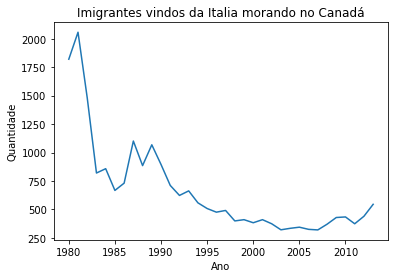

In [ ]:
# Questão 2) Faça um grafico de linha com os dados dos imigrantes vindos da Italia (coluna 102)


years = list(range(1980, 2006)) # lista de anos

italia = data.loc['Italy', years] # passing in years 1980 - 2013 to exclude the 'total' column

italia.plot()
plt.title('Imigrantes vindos da Italia morando na Austrália')
plt.xlabel('Ano') # returns a Text instance
plt.ylabel('Quantidade')
plt.show()

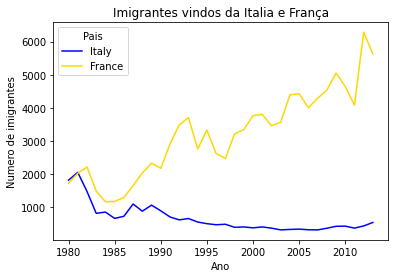

In [ ]:
# Questão 3) Compare os valores de imigrantes da Italia (102) e da França nos anos de 1980 a 2005
years = list(range(1980, 2006)) # lista de anos

df_CI = data.loc[['Italy', 'France'], years]
df_CI = df_CI.transpose()
df_CI.plot(kind='line', color=['blue','gold'])

plt.title('Imigrantes vindos da Italia e França')
plt.xlabel('Ano') # returns a Text instance
plt.ylabel('Numero de imigrantes')
plt.show()

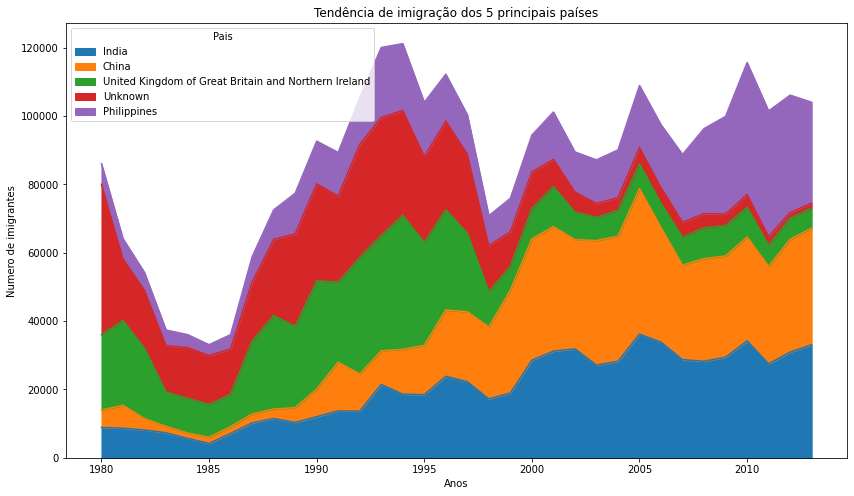

In [ ]:
# Questão 4) Compare as cruvas dos 5 países que mais contribuíram para a imigração para o Canadá

data.sort_values(by='Total', ascending=False, axis=0, inplace=True)
data = data.drop('Total')
df_top5 = data.head(5)

df_top5 = df_top5[years].transpose() 

df_top5.plot(kind='area', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Tendência de imigração dos 5 principais países')
plt.ylabel('Numero de imigrantes')
plt.xlabel('Anos')
plt.show()

In [ ]:
df_top5

Pais,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880,5123,22045,44000,6051
1981,8670,6682,24796,18078,5921
1982,8147,3308,20620,16904,5249
1983,7338,1863,10015,13635,4562
1984,5704,1527,10170,14855,3801
1985,4211,1816,9564,14368,3150
1986,7150,1960,9470,13303,4166
1987,10189,2643,21337,17304,7360
1988,11522,2758,27359,22279,8639
1989,10343,4323,23795,27118,11865


#### 01) Faça um grafico de barras com o total de imigrantes por continente

In [ ]:
data['Continente'].unique()

array(['Europe', 'Oceania', 'Northern America', 'Asia', 'World', 'Africa',
       'Latin America and the Caribbean'], dtype=object)

In [ ]:
europe = data[data['Continente'] == 'Europe']['Total'].sum(axis=0)
oceania = data[data['Continente'] == 'Oceania']['Total'].sum(axis=0)
nor_america = data[data['Continente'] == 'Northern America']['Total'].sum(axis=0)
asia = data[data['Continente'] == 'Asia']['Total'].sum(axis=0)
africa = data[data['Continente'] == 'Africa']['Total'].sum(axis=0)
latin_america = data[data['Continente'] == 'Latin America and the Caribbean']['Total'].sum(axis=0)

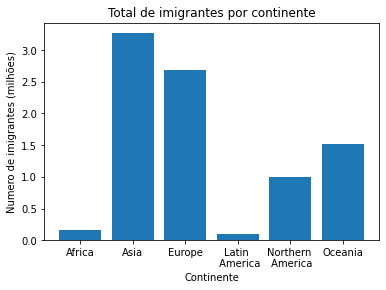

In [ ]:
import matplotlib.pyplot as plt

vals = ['Africa', 'Asia','Europe', 'Latin \n America', 'Northern \n America', 'Oceania']
imig = [africa,asia, europe, latin_america, nor_america, oceania]
imig_div = [number / 1e6 for number in imig]

plt.bar(vals,imig_div)
plt.title('Total de imigrantes por continente')
plt.ylabel('Numero de imigrantes (milhões)')
plt.xlabel('Continente')
plt.savefig("Imigrantes.png",dpi=300)
plt.show()

#### 02) Faça um grafico de area com a tendencia dos 10 países da Europa que menos contribuíram para a imigração. Considere paises que tiveram ao menos 10.000 imigrantes

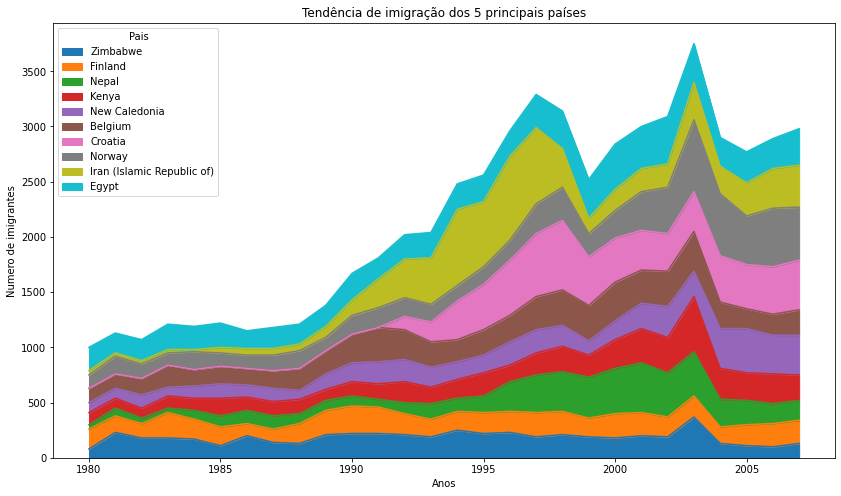

In [ ]:
# 02) Faça um grafico de area com a tendencia dos 10 países da Europa que menos contribuíram para a imigração
# Considere paises que tiveram ao menos 10.000 imigrantes

years = list(range(1980, 2008)) # lista de anos

data.sort_values(by='Total', ascending=True, axis=0, inplace=True)
df_bottom5 = data[data['Total'] > 10000].head(10)

df_bottom5 = df_bottom5[years].transpose() 

df_bottom5.plot(kind='area', figsize=(14, 8)) 
plt.title('Tendência de imigração dos 5 principais países')
plt.ylabel('Numero de imigrantes')
plt.xlabel('Anos')
plt.show()

#### 03) Faça um grafico de linha com os dados dos imigrantes vindos da Nova Zelância nos anos de 1985 a 2005

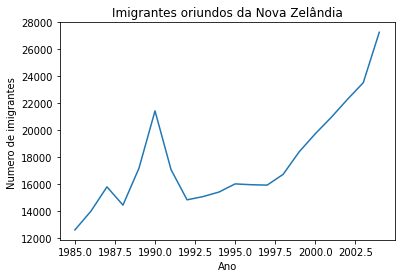

In [ ]:
# 03) Faça um grafico de linha com os dados dos imigrantes vindos da Nova Zelância nos anos de 1985 a 2005

years = list(range(1985, 2005)) # lista de anos

nova_zelandia = data.loc['New Zealand', years] 

nova_zelandia.plot()
plt.title('Imigrantes oriundos da Nova Zelândia')
plt.xlabel('Ano') 
plt.ylabel('Numero de imigrantes ')
plt.show()


#### 04) Compare a tendência dos países dos continentes Asia e Africa que mais contribuiram para imagraçao . (O principal país de cada continente)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


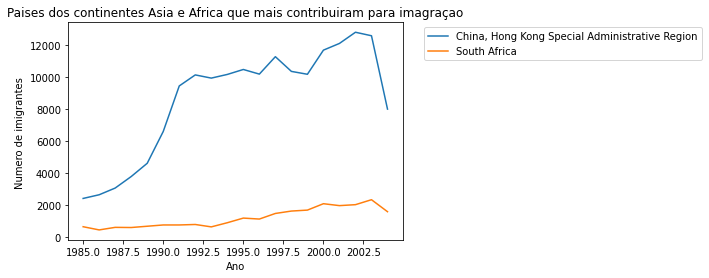

In [ ]:
asia_cont = data[data['Continente'] == 'Asia']
asia_cont.sort_values(by='Total', ascending=False, axis=0, inplace=True)
asia_index = asia_cont.head(1)

asia_country = data.loc[asia_index.index[0], years] 

africa_cont = data[data['Continente'] == 'Africa']
africa_cont.sort_values(by='Total', ascending=False, axis=0, inplace=True)
africa_index = africa_cont.head(1)
africa_country = data.loc[africa_index.index[0], years] 

asia_country.plot()
africa_country.plot()

plt.title('Paises dos continentes Asia e Africa que mais contribuiram para imagraçao')
plt.xlabel('Ano') 
plt.ylabel('Numero de imigrantes ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 05) Faça um grafico de barras com o total de imigantes dos 3 paises que mais contribuíram para a imigração

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


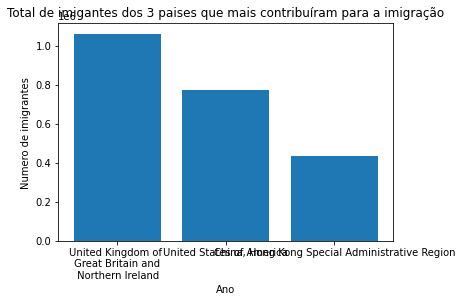

In [ ]:

data.sort_values(by='Total', ascending=False, axis=0, inplace=True)
mais_cont = data.head(4)
mais_cont.rename({mais_cont.index[1]: 'United Kingdom of \n Great Britain and \n Northern Ireland'}, inplace = True) #renomeia o index 1

plt.bar(mais_cont.index[1:4], mais_cont['Total'][1:4])
plt.title('Total de imigantes dos 3 paises que mais contribuíram para a imigração')
plt.xlabel('Ano') 
plt.ylabel('Numero de imigrantes ')
plt.show()